In [6]:
import tensorflow as tf
import os
import cv2
import imghdr


# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

tf.config.list_physical_devices('GPU')


data_dir = 'manji' 
image_exts = ['jpeg','jpg', 'bmp', 'png']


data = tf.keras.utils.image_dataset_from_directory(data_dir, image_size=(256,256), batch_size=32) #defaulted 32 batch size
element_spec = data.element_spec

# Access the first batch from the dataset
first_batch = next(iter(data))

# Extract the first image from the batch
first_image = first_batch[0][0]
image_shape = first_image.shape
image_size = (first_image.shape[0], first_image.shape[1])


#Class 0 = dobre slike
# Class 1 = lose slike
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

print(image_size)



data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()



train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)


Found 6255 files belonging to 2 classes.
(256, 256)


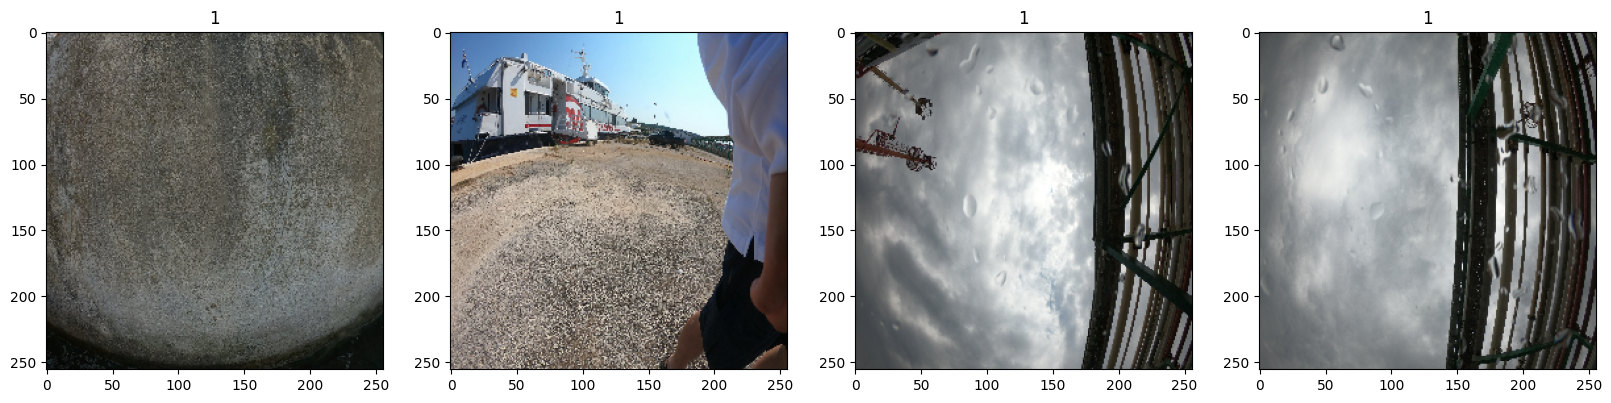

In [7]:
import numpy as np
from matplotlib import pyplot as plt
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Build model

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

# jednostavniji model

In [4]:
model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# malo kompliciraniji model

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(128, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

# Train

In [ ]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

In [ ]:
model.save(os.path.join('models','jednaki_DS_model.h5'))

# jos jedan model



In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint
import tensorflow as tf
from keras.callbacks import TensorBoard

tensorboard_callback = TensorBoard(log_dir='logs', histogram_freq=1)


# Model definition
model = Sequential()

model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(128, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())

model.add(Dropout(0.5))  # Add dropout layer
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Add dropout layer
model.add(BatchNormalization())  # Add batch normalization
model.add(Dense(1, activation='sigmoid'))

model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

# Learning rate scheduler
def scheduler(epoch, lr):
    return lr * 0.9  # You can adjust the multiplier as needed

lr_scheduler = LearningRateScheduler(scheduler)

# Early stopping and model checkpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)

# Training the model
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback, lr_scheduler, early_stopping, model_checkpoint])


Epoch 1/20
137/137 [==============================] - 126s 904ms/step - loss: 0.2422 - accuracy: 0.8912 - val_loss: 0.1161 - val_accuracy: 0.9752 - lr: 9.0000e-04
Epoch 2/20


C:\Users\Vrsa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


137/137 [==============================] - 124s 894ms/step - loss: 0.1272 - accuracy: 0.9521 - val_loss: 0.0680 - val_accuracy: 0.9784 - lr: 8.1000e-04
Epoch 3/20
137/137 [==============================] - 136s 978ms/step - loss: 0.1033 - accuracy: 0.9626 - val_loss: 0.0528 - val_accuracy: 0.9840 - lr: 7.2900e-04
Epoch 4/20
137/137 [==============================] - 180s 1s/step - loss: 0.1082 - accuracy: 0.9644 - val_loss: 0.1040 - val_accuracy: 0.9615 - lr: 6.5610e-04
Epoch 5/20
137/137 [==============================] - 177s 1s/step - loss: 0.0873 - accuracy: 0.9703 - val_loss: 0.0433 - val_accuracy: 0.9872 - lr: 5.9049e-04
Epoch 6/20
137/137 [==============================] - 176s 1s/step - loss: 0.0790 - accuracy: 0.9735 - val_loss: 0.0604 - val_accuracy: 0.9800 - lr: 5.3144e-04
Epoch 7/20
137/137 [==============================] - 182s 1s/step - loss: 0.0656 - accuracy: 0.9790 - val_loss: 0.0908 - val_accuracy: 0.9639 - lr: 4.7830e-04
Epoch 8/20
137/137 [=========================

# Plot

In [2]:
from matplotlib import pyplot as plt 
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

NameError: name 'hist' is not defined

<Figure size 640x480 with 0 Axes>

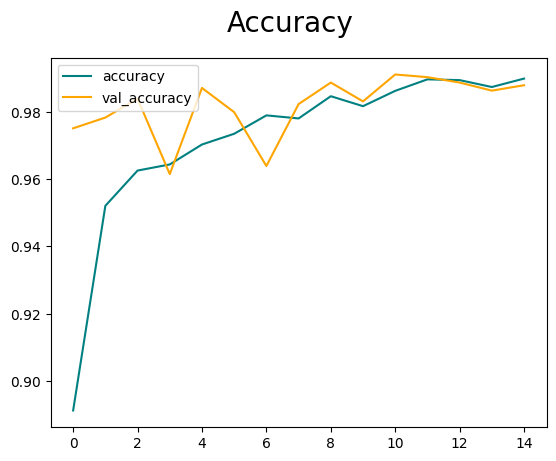

In [6]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Eval 

In [7]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

pre = Precision()
re = Recall()
acc = BinaryAccuracy()

for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)


print(pre.result(), re.result(), acc.result())

1/1 [==============================] - 0s 121ms/step
tf.Tensor(0.9904762, shape=(), dtype=float32) tf.Tensor(0.9842271, shape=(), dtype=float32) tf.Tensor(0.9868421, shape=(), dtype=float32)


#  test

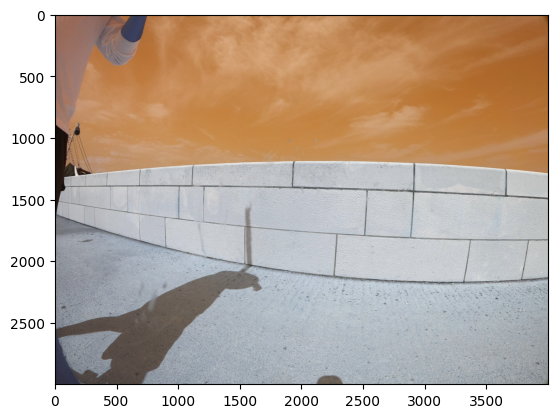

In [3]:
import cv2
from matplotlib import pyplot as plt 

img = cv2.imread('Cam_D_087901.jpg')
plt.imshow(img)
plt.show()

In [5]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

NameError: name 'tf' is not defined

In [11]:
import numpy as np
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 96ms/step


In [12]:
yhat

array([[7.197686e-05]], dtype=float32)

In [13]:
if yhat > 0.5: 
    print(f'Predicted class is Lose')
else:
    print(f'Predicted class is Dobra')

Predicted class is Dobra


In [14]:
# save model 
from tensorflow.keras.models import load_model
model.save(os.path.join('models','3000_losih_i_dobrih_1_projekt_model.h5'))



C:\Users\Vrsa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
new_model = load_model('models/prvi_model_yT_guy.h5')

new_model.predict(np.expand_dims(resize/255, 0))

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Model

def AlexNet():
  inp = layers.Input((256, 256, 3))
  x = layers.Conv2D(96, 11, 4, activation='relu')(inp)
  x = layers.BatchNormalization()(x)
  x = layers.MaxPooling2D(3, 2)(x)
  x = layers.Conv2D(256, 5, 1, activation='relu')(x)
  x = layers.BatchNormalization()(x)
  x = layers.MaxPooling2D(3, 2)(x)
  x = layers.Conv2D(384, 3, 1, activation='relu')(x)
  x = layers.Conv2D(384, 3, 1, activation='relu')(x)
  x = layers.Conv2D(256, 3, 1, activation='relu')(x)
  x = layers.MaxPooling2D(3, 2)(x)
  x = layers.Flatten()(x)
  x = layers.Dense(4096, activation='relu')(x)
  x = layers.Dropout(0.5)(x)
  x = layers.Dense(4096, activation='relu')(x)
  x = layers.Dropout(0.5)(x)
  x = layers.Dense(1, activation='sigmoid')(x)

  model_ADAM_pametni = Model(inputs=inp, outputs=x)

  return   model_ADAM_pametni 


model_ADAM_pametni = AlexNet()
model_ADAM_pametni.summary()

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

model_ADAM_pametni.compile(loss=BinaryCrossentropy(),
              optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=5, 
                   monitor='loss')

In [ ]:
model_ADAM_pametni.fit(train, epochs=20, validation_data=test,
          callbacks=[es])

In [ ]:
# save model 
from tensorflow.keras.models import load_model
model_ADAM_pametni.save(os.path.join('models','AlexNetModel.h5'))

new_model = load_model('models/AlexNetModel.h5')


# VGG16 model  - treba jaci komp

In [ ]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [ ]:
model_vgg = Sequential()
model_vgg.add(Conv2D(input_shape=(256,256,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model_vgg.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model_vgg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model_vgg.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model_vgg.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model_vgg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model_vgg.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model_vgg.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model_vgg.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model_vgg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model_vgg.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model_vgg.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model_vgg.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model_vgg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model_vgg.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model_vgg.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model_vgg.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model_vgg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [ ]:
model_vgg.add(Flatten())
model_vgg.add(Flatten())
model_vgg.add(Dense(512, activation='relu'))
model_vgg.add(Dense(256, activation='relu'))
model_vgg.add(Dense(1, activation='sigmoid'))

In [ ]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model_vgg.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
model_vgg.summary()

model_vgg.fit(train,epochs=20, validation_data= val,callbacks=[tensorboard_callback])